<a href="https://colab.research.google.com/github/RodolphoSartori/Macro/blob/main/PMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidrapy

In [ ]:
import pandas as pd
import sidrapy as sidra

In [ ]:
dados= pd.read_json(path_or_buf = "https://apisidra.ibge.gov.br/values/t/8688/n1/all/v/all/p/all/c11046/all/c12355/107071/d/v7167%205,v7168%205,v11623%201,v11624%201,v11625%201,v11626%201?formato=json")
dados

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês,Tipos de índice (Código),Tipos de índice,Atividades de serviços (Código),Atividades de serviços
1,1,Brasil,30,Número-índice,52.28597,1,Brasil,7167,PMS - Número-índice (2022=100),201101,janeiro 2011,56725,Índice de receita nominal de serviços,107071,Total
2,1,Brasil,30,Número-índice,84.30990,1,Brasil,7167,PMS - Número-índice (2022=100),201101,janeiro 2011,56726,Índice de volume de serviços,107071,Total
3,1,Brasil,30,Número-índice,52.26555,1,Brasil,7167,PMS - Número-índice (2022=100),201102,fevereiro 2011,56725,Índice de receita nominal de serviços,107071,Total
4,1,Brasil,30,Número-índice,83.75978,1,Brasil,7167,PMS - Número-índice (2022=100),201102,fevereiro 2011,56726,Índice de volume de serviços,107071,Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,1,Brasil,2,%,2.3,1,Brasil,11626,PMS - Variação acumulada em 12 meses (em relaç...,202409,setembro 2024,56726,Índice de volume de serviços,107071,Total
2001,1,Brasil,2,%,7.4,1,Brasil,11626,PMS - Variação acumulada em 12 meses (em relaç...,202410,outubro 2024,56725,Índice de receita nominal de serviços,107071,Total
2002,1,Brasil,2,%,2.8,1,Brasil,11626,PMS - Variação acumulada em 12 meses (em relaç...,202410,outubro 2024,56726,Índice de volume de serviços,107071,Total
2003,1,Brasil,2,%,7.4,1,Brasil,11626,PMS - Variação acumulada em 12 meses (em relaç...,202411,novembro 2024,56725,Índice de receita nominal de serviços,107071,Total


In [ ]:
dados_limpos = dados[["V", "MN", "D2N", "D3C", "D4N"]]
dados_limpos = dados_limpos.drop(index=0)
dados_limpos = dados_limpos.rename(columns={"V": "Valor", "MN":"Unidade de Medida", "D2N":"Variável", "D3C": "Data", "D4N":"Tipo de Dado"})
dados_limpos = dados_limpos [["Data", "Unidade de Medida", "Variável", "Valor", "Tipo de Dado"]]
dados_limpos["Data"] = pd.to_datetime(dados_limpos["Data"], format='%Y%m')
dados_limpos["Valor"] = dados_limpos["Valor"].replace('...', pd.NA)
dados_limpos = dados_limpos.dropna(subset=["Valor"])
dados_limpos["Valor"] = pd.to_numeric(dados_limpos["Valor"])
dados_limpos

,Data,Unidade de Medida,Variável,Valor,Tipo de Dado
1,2011-01-01,Número-índice,PMS - Número-índice (2022=100),52.28597,Índice de receita nominal de serviços
2,2011-01-01,Número-índice,PMS - Número-índice (2022=100),84.30990,Índice de volume de serviços
3,2011-02-01,Número-índice,PMS - Número-índice (2022=100),52.26555,Índice de receita nominal de serviços
4,2011-02-01,Número-índice,PMS - Número-índice (2022=100),83.75978,Índice de volume de serviços
5,2011-03-01,Número-índice,PMS - Número-índice (2022=100),55.88434,Índice de receita nominal de serviços
...,...,...,...,...,...
2000,2024-09-01,%,PMS - Variação acumulada em 12 meses (em relaç...,2.30000,Índice de volume de serviços
2001,2024-10-01,%,PMS - Variação acumulada em 12 meses (em relaç...,7.40000,Índice de receita nominal de serviços
2002,2024-10-01,%,PMS - Variação acumulada em 12 meses (em relaç...,2.80000,Índice de volume de serviços
2003,2024-11-01,%,PMS - Variação acumulada em 12 meses (em relaç...,7.40000,Índice de receita nominal de serviços


In [ ]:
dados_limpos = dados_limpos.drop(columns=["Unidade de Medida"])
dados_limpos

,Data,Variável,Valor,Tipo de Dado
1,2011-01-01,PMS - Número-índice (2022=100),52.28597,Índice de receita nominal de serviços
2,2011-01-01,PMS - Número-índice (2022=100),84.30990,Índice de volume de serviços
3,2011-02-01,PMS - Número-índice (2022=100),52.26555,Índice de receita nominal de serviços
4,2011-02-01,PMS - Número-índice (2022=100),83.75978,Índice de volume de serviços
5,2011-03-01,PMS - Número-índice (2022=100),55.88434,Índice de receita nominal de serviços
...,...,...,...,...
2000,2024-09-01,PMS - Variação acumulada em 12 meses (em relaç...,2.30000,Índice de volume de serviços
2001,2024-10-01,PMS - Variação acumulada em 12 meses (em relaç...,7.40000,Índice de receita nominal de serviços
2002,2024-10-01,PMS - Variação acumulada em 12 meses (em relaç...,2.80000,Índice de volume de serviços
2003,2024-11-01,PMS - Variação acumulada em 12 meses (em relaç...,7.40000,Índice de receita nominal de serviços


In [ ]:
dados_limpos["Variável"] = dados_limpos["Variável"].replace("PMC - Número-índice (2022=100)", "Nº Índice (base 2022)")
dados_limpos["Variável"] = dados_limpos["Variável"].replace("PMC - Número-índice com ajuste sazonal (2022=100)", "Nº Índice_A.S (base 2022)")
dados_limpos["Variável"] = dados_limpos["Variável"].replace("PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1)", "Var m/m-1 com A.S")
dados_limpos["Variável"] = dados_limpos["Variável"].replace("PMC - Variação mês/mesmo mês do ano anterior (M/M-12)", "Var m/m-12")
dados_limpos["Variável"] = dados_limpos["Variável"].replace("PMC - Variação acumulada no ano (em relação ao mesmo período do ano anterior)", "Var.Acumulada (ano)")
dados_limpos["Variável"] = dados_limpos["Variável"].replace("PMC - Variação acumulada em 12 meses (em relação ao período anterior de 12 meses)", "Var.Acumulada (12 meses)")
dados_limpos

,Data,Variável,Valor,Tipo de Dado
1,2011-01-01,PMS - Número-índice (2022=100),52.28597,Índice de receita nominal de serviços
2,2011-01-01,PMS - Número-índice (2022=100),84.30990,Índice de volume de serviços
3,2011-02-01,PMS - Número-índice (2022=100),52.26555,Índice de receita nominal de serviços
4,2011-02-01,PMS - Número-índice (2022=100),83.75978,Índice de volume de serviços
5,2011-03-01,PMS - Número-índice (2022=100),55.88434,Índice de receita nominal de serviços
...,...,...,...,...
2000,2024-09-01,PMS - Variação acumulada em 12 meses (em relaç...,2.30000,Índice de volume de serviços
2001,2024-10-01,PMS - Variação acumulada em 12 meses (em relaç...,7.40000,Índice de receita nominal de serviços
2002,2024-10-01,PMS - Variação acumulada em 12 meses (em relaç...,2.80000,Índice de volume de serviços
2003,2024-11-01,PMS - Variação acumulada em 12 meses (em relaç...,7.40000,Índice de receita nominal de serviços


In [ ]:
#visualizar
!pip install seaborn
import seaborn as sns

Text(0.45, 1.05, 'PMS')

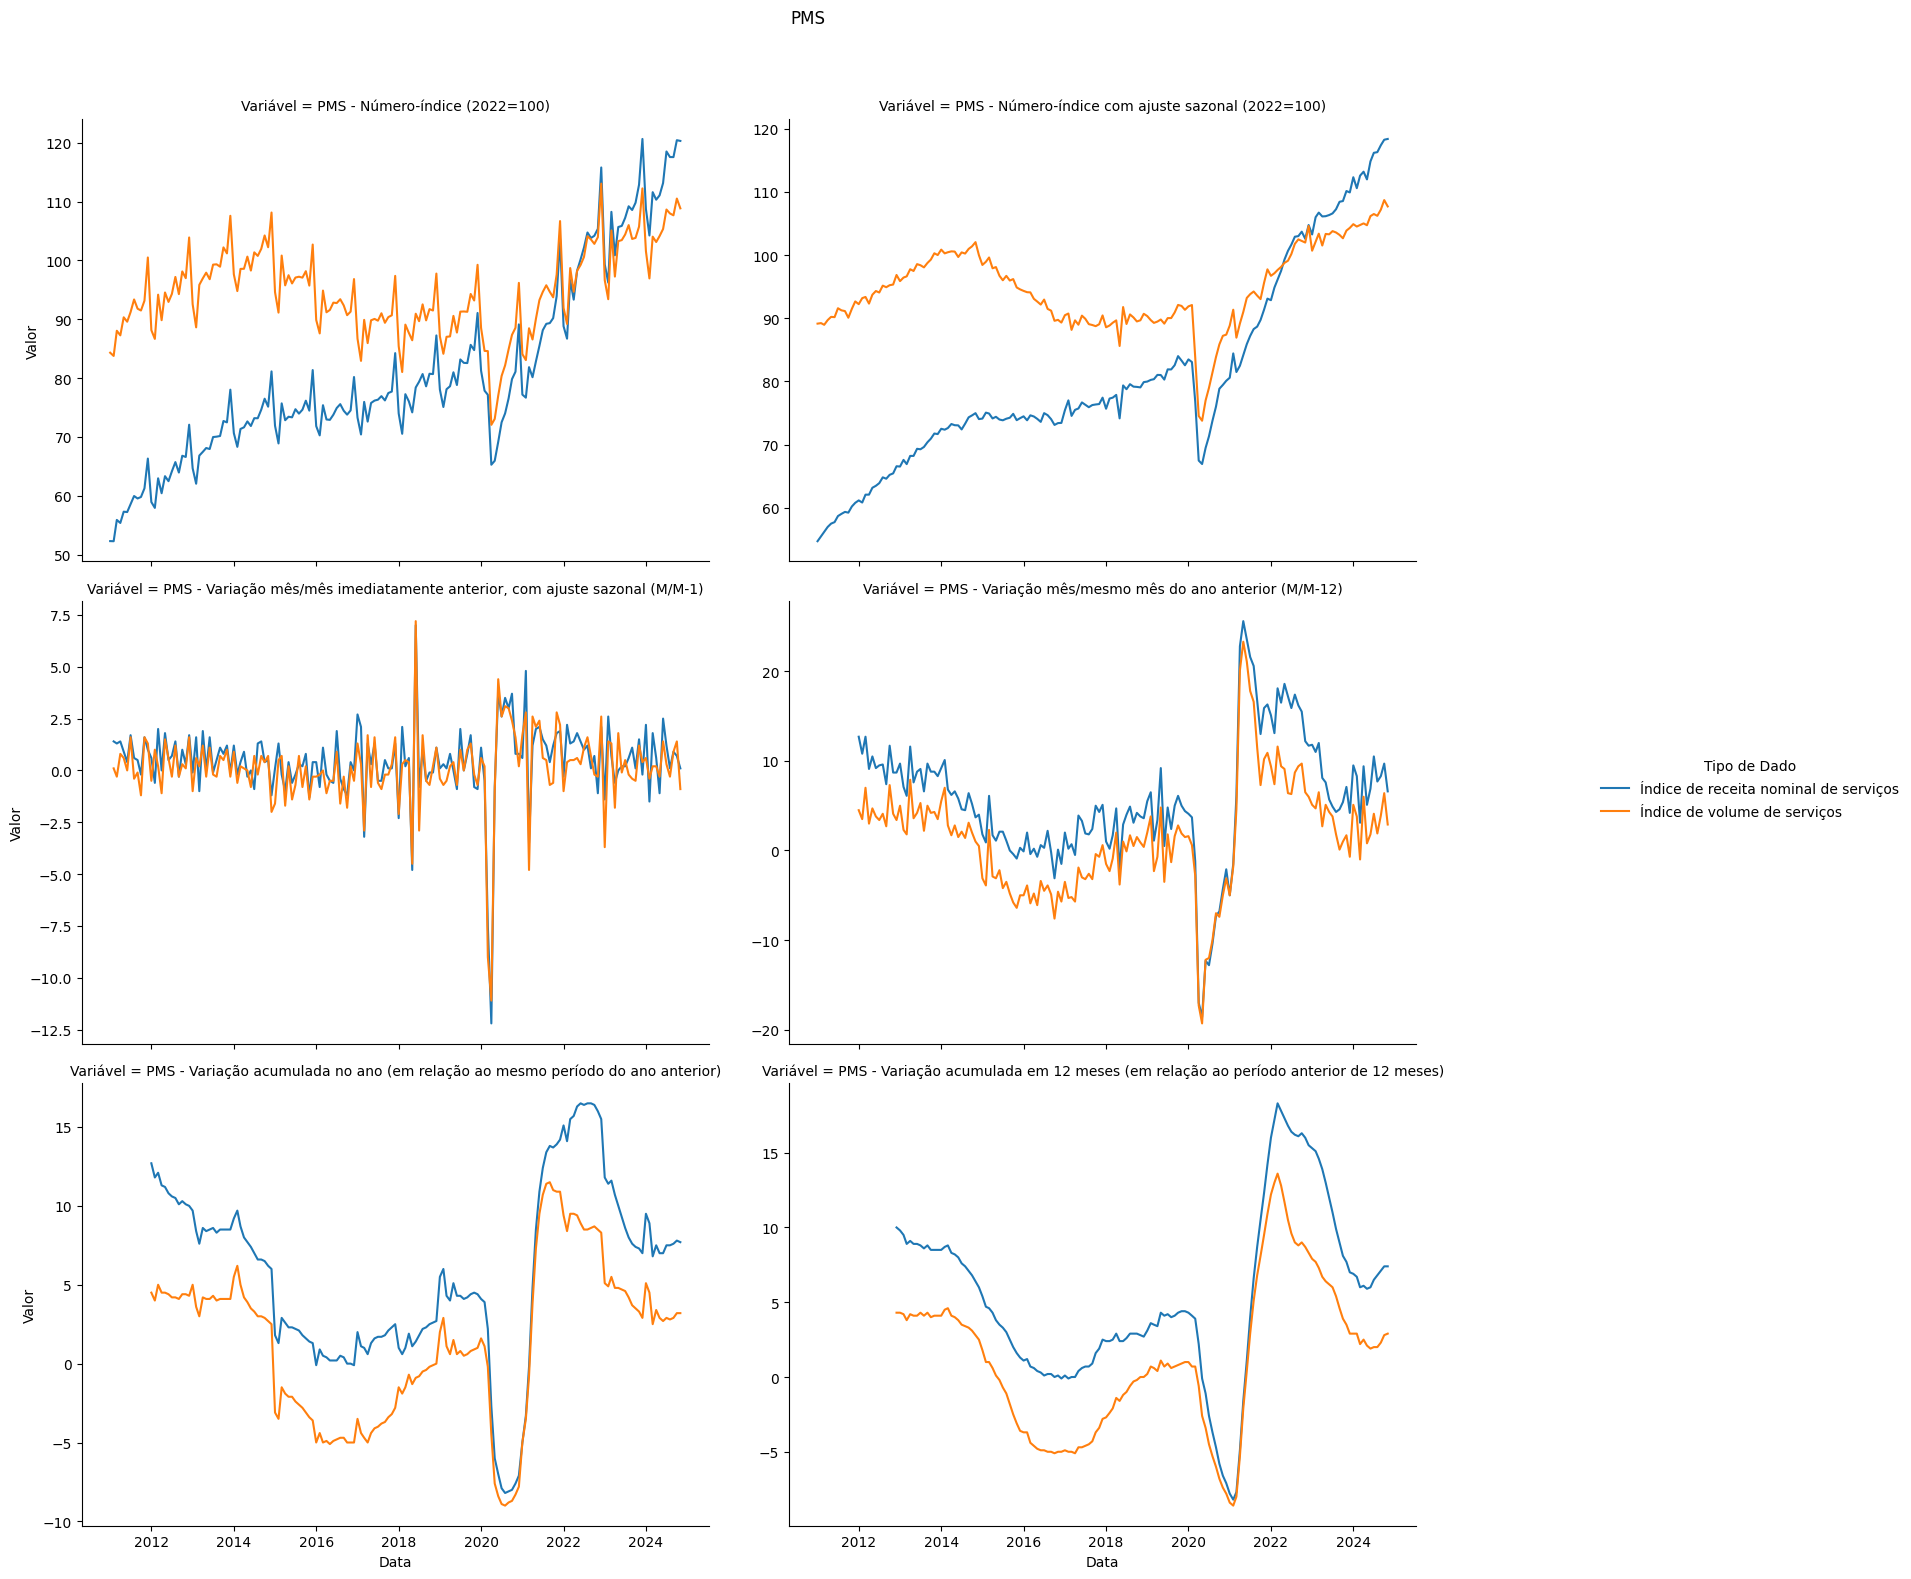

In [ ]:
gráfico = sns.relplot(data=dados_limpos, x="Data", y="Valor", kind="line", hue="Tipo de Dado",  col = "Variável", col_wrap=2,
            facet_kws={"sharey": False})

gráfico.fig.set_figwidth(20)
gráfico.fig.suptitle("PMS", x=0.45, y=1.05) # Ajusta a posição do título